Diffractogramme du AgBiS2

In [ ]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import *


In [ ]:
mp_key = "0TSH4JPmYApoWkybWbmreInYgdHzp5GT"
mp_id = "mp-29678"

In [ ]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
xrd = XRDCalculator(wavelength = 'CuKa1')
pattern = xrd.get_pattern(conv_struc) 
indices = pattern.hkls

Nous allons faire une analyse des 3 premiers pics de Bragg du diffractogramme du AgBiS2 avec un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

Lorsque l'on diffracte un rayonnment X sur un réseau d'atomes, nous pouvons observer des phénomènes d'interférences constructives et destructives. Les angles correspondant à l'emplacement des pics de Bragg peuvent être retrouvés grâce à la loi de Bragg : 2$d_{hkl}$sin($\theta$)=n$\lambda$ où :

n est l'ordre de la réflexion, 

$d_{hkl}$ est la distance entre 2 plans interatomiques (h k l ), 

$\lambda$ est la longeur d'onde du rayonnement et

$\theta$ est la différence entre l'angle de la direction incidente de l'onde et l'angle de la direction d'observation.



L'intensité des pics quant à elle est due au :

facteur de forme atomique qui dépend du type d'atome sur lequel le rayon a été diffracté, 

de l'angle $\theta$ et 

est proportionnelle à la multiplicité du plan atomique (h k l), en effet une grande multiplicité implique que plus de plans peuvent contribuer à la diffraction et donc à une plus grande intensité observée.

On utilise la maille conventionnelle pour avoir la même figure qu'avec Materials Project.

Premier pic de diffraction

In [ ]:
print('2θ (°) = ', pattern.x[0])
print("Intensité (relative au plus haut pic) = ", pattern.y[0])
print("Indices hkil et multiplicité ", indices[0])
print("Distance interplanaire (Å): ", pattern.d_hkls[0])

2θ (°) =  13.891437316161609
Intensité (relative au plus haut pic) =  11.36793960778157
Indices hkil et multiplicité  [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]
Distance interplanaire (Å):  6.369689979095023


Deuxième pique de diffraction

In [ ]:
print('2θ (°) = ', pattern.x[1])
print("Intensité (relative au plus haut pic) = ", pattern.y[1])
print("Indices hkil et multiplicité ", indices[1])
print("Distance interplanaire (Å): ", pattern.d_hkls[1])

2θ (°) =  25.805608871131216
Intensité (relative au plus haut pic) =  9.608890202124853
Indices hkil et multiplicité  [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}]
Distance interplanaire (Å):  3.4495633489528643


Troisième pic de diffraction

In [ ]:
print('2θ (°) = ', pattern.x[2])
print("Intensité (relative au plus haut pic) = ", pattern.y[2])
print("Indices hkil et multiplicité ", indices[2])
print("Distance interplanaire (Å): ", pattern.d_hkls[2])

2θ (°) =  27.06046176380919
Intensité (relative au plus haut pic) =  62.15757230688643
Indices hkil et multiplicité  [{'hkl': (1, 0, -1, 2), 'multiplicity': 12}]
Distance interplanaire (Å):  3.2923804463205255


On voit que les pics de diffraction correspondent à ceux du Materials Project


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

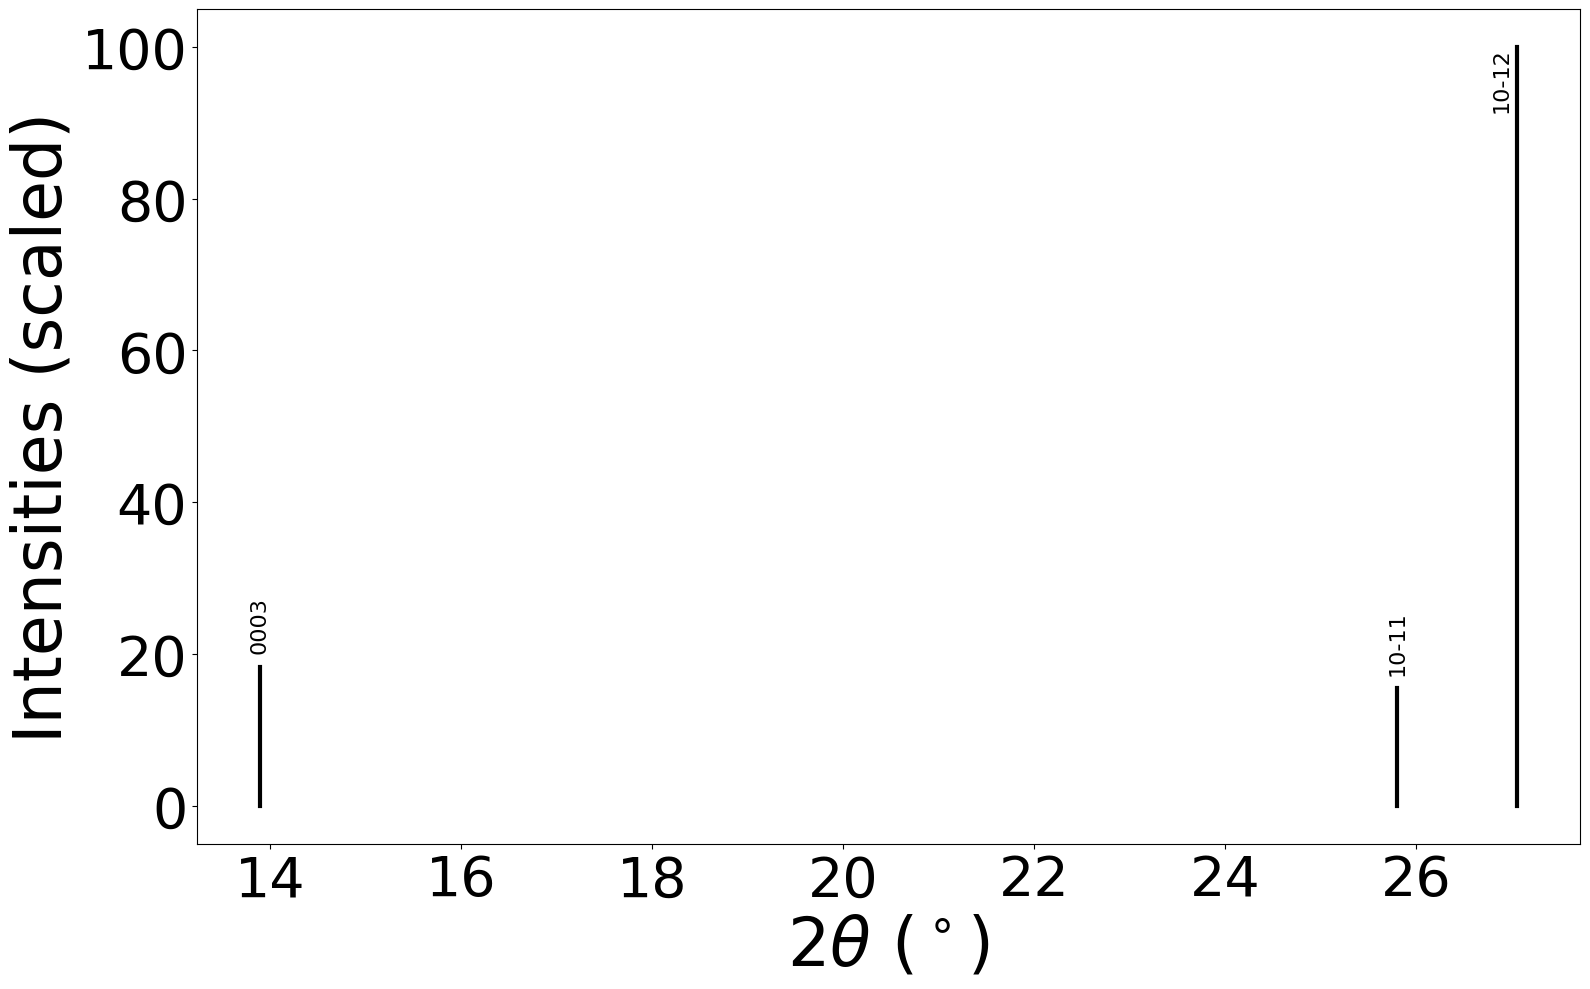

In [ ]:
xrd.get_plot(conv_struc, two_theta_range=(0,27.5))